<a href="https://colab.research.google.com/github/AbnerRidigolo/classificador-de-imagens-CNN-DeepLearning/blob/main/CNN_com_BasECIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
# 1. Carregamento e Pré-processamento dos Dados
print("1. Carregando e pré-processando o dataset CIFAR-10...")

# Carregar o dataset CIFAR-10 diretamente do Keras
# O dataset consiste em 50.000 imagens de treino e 10.000 de teste.
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Nomes das 10 classes para visualização e relatórios
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Normalizar os dados de pixel
# Converter os valores de 0-255 para um intervalo de 0-1.
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Converter os rótulos para o formato "one-hot encoding"
# Isso é essencial para o cálculo da função de perda 'categorical_crossentropy'.
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Pré-processamento concluído.")
print(f"Shape dos dados de treino: {x_train.shape}")
print(f"Shape dos rótulos de treino: {y_train.shape}")
print("-" * 50)


1. Carregando e pré-processando o dataset CIFAR-10...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Pré-processamento concluído.
Shape dos dados de treino: (50000, 32, 32, 3)
Shape dos rótulos de treino: (50000, 10)
--------------------------------------------------


In [ ]:
# 2. Construção da Arquitetura do Modelo CNN
print("2. Construindo a arquitetura do modelo CNN...")

# Definir o modelo sequencial. A arquitetura segue a progressão:
# CONV -> RELU -> POOL -> CONV -> RELU -> POOL -> FLATTEN -> DENSE -> DROPOUT -> DENSE
model = Sequential()

# Bloco 1 de camadas Convolucionais
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Bloco 2 de camadas Convolucionais
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Transição para a camada densa
model.add(Flatten())

# Camadas Totalmente Conectadas (Dense) para classificação
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Exibir o resumo do modelo para visualização
model.summary()
print("Arquitetura do modelo concluída.")
print("-" * 50)



2. Construindo a arquitetura do modelo CNN...


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,250,858 (4.77 MB)

 Trainable params: 1,250,858 (4.77 MB)

 Non-trainable params: 0 (0.00 B)

Arquitetura do modelo concluída.
--------------------------------------------------


In [4]:
# 3. Compilação e Treinamento do Modelo
# ==============================================================================
print("3. Compilando e treinando o modelo...")

# Compilar o modelo
# Usar o otimizador Adam e a função de perda adequada para classificação multiclasse.
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Treinar o modelo
# O processo de treinamento será executado por 50 épocas.
history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=1
)

print("\nTreinamento finalizado.")
print("-" * 50)


3. Compilando e treinando o modelo...
Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 201s 254ms/step - accuracy: 0.3224 - loss: 1.8230 - val_accuracy: 0.5462 - val_loss: 1.2683
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 255ms/step - accuracy: 0.5719 - loss: 1.2068 - val_accuracy: 0.6511 - val_loss: 0.9980
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 199s 254ms/step - accuracy: 0.6418 - loss: 1.0105 - val_accuracy: 0.6962 - val_loss: 0.8617
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 202s 255ms/step - accuracy: 0.6865 - loss: 0.8905 - val_accuracy: 0.7237 - val_loss: 0.7921
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 198s 253ms/step - accuracy: 0.7140 - loss: 0.8078 - val_accuracy: 0.7398 - val_loss: 0.7596
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 199s 254ms/step - accuracy: 0.7368 - loss: 0.7528 - val_accuracy: 0.7291 - val_loss: 0.7683
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 198s 254ms/step - accuracy: 0.7510 - loss: 0.7068 - val_accuracy: 0.7463 - val_loss: 0.7296
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━

4. Avaliando o modelo e gerando relatórios de desempenho...
Precisão do modelo nos dados de teste: 0.8015
--------------------------------------------------
313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step

Relatório de Classificação Detalhado:
              precision    recall  f1-score   support

    airplane       0.80      0.84      0.82      1000
  automobile       0.91      0.89      0.90      1000
        bird       0.75      0.68      0.71      1000
         cat       0.65      0.60      0.62      1000
        deer       0.76      0.81      0.78      1000
         dog       0.71      0.72      0.72      1000
        frog       0.80      0.89      0.84      1000
       horse       0.83      0.86      0.85      1000
        ship       0.92      0.85      0.88      1000
       truck       0.89      0.88      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

--

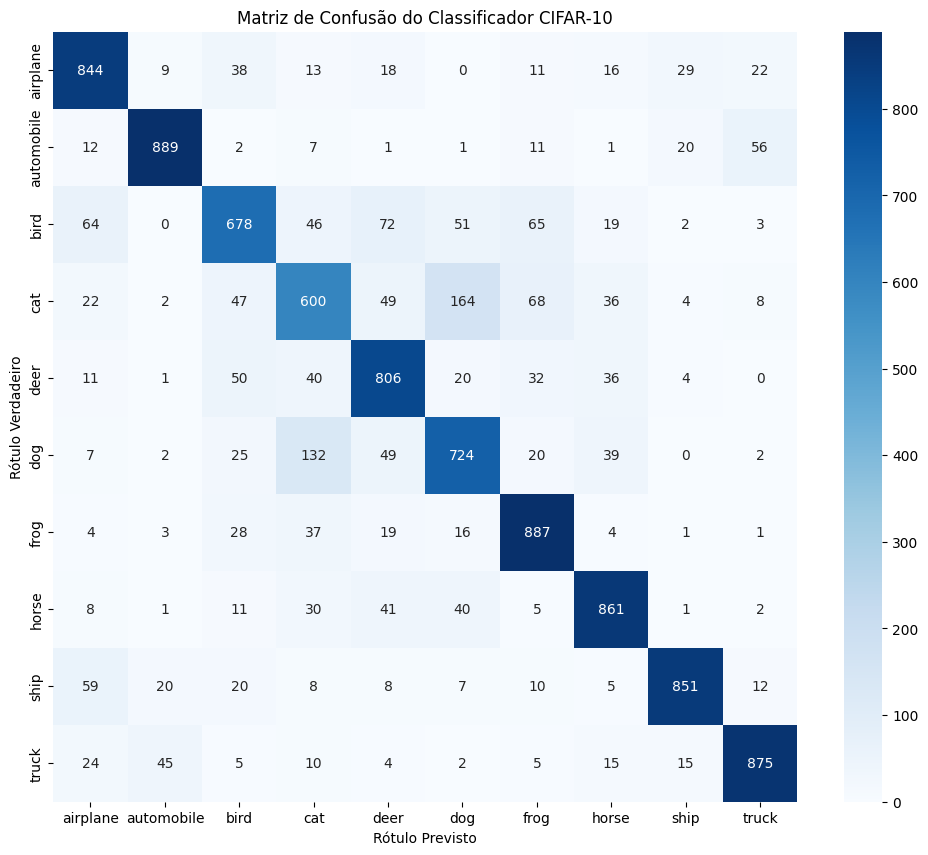

In [5]:
# 4. Avaliação e Análise de Resultados

print("4. Avaliando o modelo e gerando relatórios de desempenho...")

# Avaliar o desempenho geral do modelo nos dados de teste
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Precisão do modelo nos dados de teste: {test_accuracy:.4f}")
print("-" * 50)

# Gerar o relatório de classificação detalhado
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print("\nRelatório de Classificação Detalhado:")
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))
print("-" * 50)

# Gerar e plotar a Matriz de Confusão
# Esta é a parte crucial para entender as fraquezas do modelo.
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Matriz de Confusão do Classificador CIFAR-10')
plt.xlabel('Rótulo Previsto')
plt.ylabel('Rótulo Verdadeiro')
plt.show()
